In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dtype_list = {'event_id':np.int16, 'ref_type':'category', 'ref_hash':np.int64, 'aplication_id':np.int16, 'atributed':bool, \
              'device_countrycode':'category', 'trans_id':'category', 'device_os':'category', 'wifi':object,\
              'connection_type':'category'}
events = pd.read_csv('data/train_events.csv.gzip', dtype=dtype_list, parse_dates= ['date'])

In [3]:
events['wifi'] = (events['wifi'] == 'true')

In [4]:
device_countrycode = events['device_countrycode'].unique()[0]
device_countrycode

'6333597102633388268'

In [ ]:
del events['device_countrycode']

In [7]:
events['hour'] = events['date'].dt.hour

In [8]:
events['day'] = events['date'].dt.day

In [9]:
del events['event_uuid']

In [30]:
len(events)

2494423

In [11]:
events.head().T

,0,1,2,3,4
date,2019-03-05 00:09:36.966000,2019-03-05 00:09:38.920000,2019-03-05 00:09:26.195000,2019-03-05 00:09:31.107000,2019-03-09 21:00:36.585000
event_id,0,1,0,2,3
ref_type,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343,1891515180541284343
ref_hash,2688759737656491380,2688759737656491380,2688759737656491380,2688759737656491380,2635154697734164782
application_id,38,38,38,38,38
attributed,False,False,False,False,False
device_os_version,5.9087e+17,5.9087e+17,5.9087e+17,5.9087e+17,7.39184e+18
device_brand,NaN,NaN,NaN,NaN,NaN
device_model,5.99012e+18,5.99012e+18,5.99012e+18,5.99012e+18,5.9609e+18
device_city,3.25822e+18,3.25822e+18,3.25822e+18,2.55178e+18,6.95933e+18


Text(0.5, 0, 'aplicaciones')

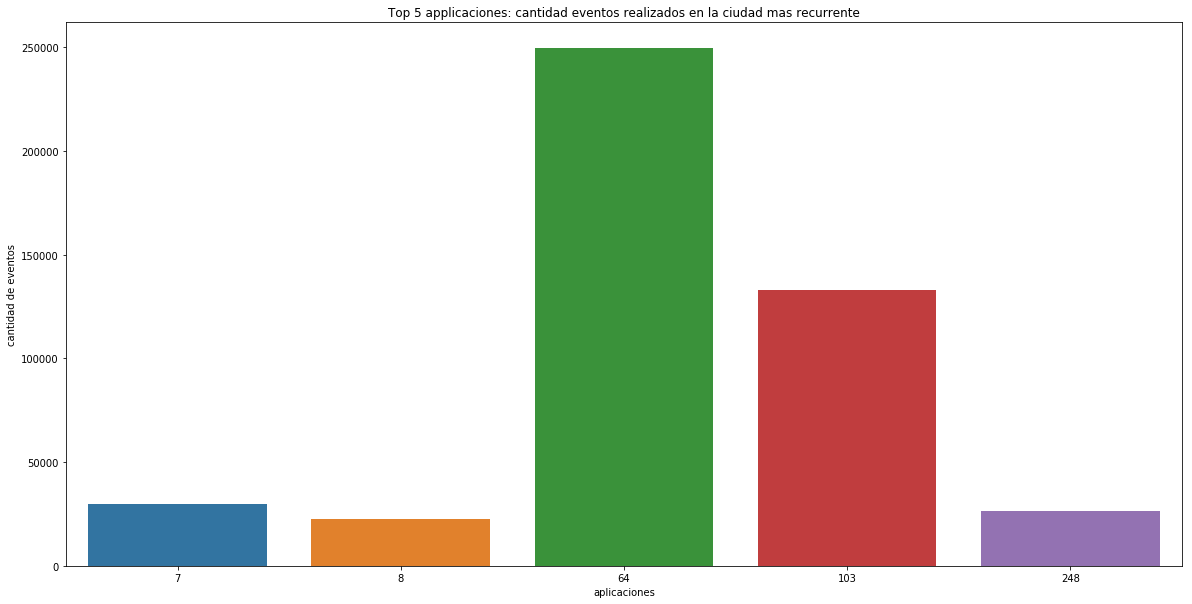

In [142]:
top_city = [x for x in events['device_city'].value_counts().head(1).keys()]

events_city_app = events.loc[events['device_city'].isin(top_city), ['application_id']].reset_index()
events_city_app.insert(loc = 1, column = 'cant', value = 1)
events_city_app = events_city_app.groupby(['application_id']).agg('sum').nlargest(5, 'cant').reset_index()

plt.figure(figsize=(20,10))
graph_city_app_events = sns.barplot (x=events_city_app['application_id'], y=events_city_app['cant'], data = events_city_app)
graph_city_app_events.set_title("Top 5 applicaciones: cantidad eventos realizados en la ciudad mas recurrente")
graph_city_app_events.set_ylabel("cantidad de eventos")
graph_city_app_events.set_xlabel("aplicaciones")

Text(0.5, 0, 'Tipo de publicidad')

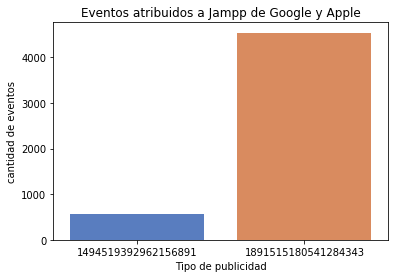

In [9]:
events_atributed_ref_type = events.loc[events['attributed'] == True, ['ref_type']]

graph_attributed_events = sns.countplot(x = events_atributed_ref_type['ref_type'], data = events_atributed_ref_type,\
                                        palette='muted')

graph_attributed_events.set_title("Eventos atribuidos a Jampp de Google y Apple")
graph_attributed_events.set_ylabel("cantidad de eventos")
graph_attributed_events.set_xlabel("Tipo de publicidad")

Text(0.5, 0, 'Hora')

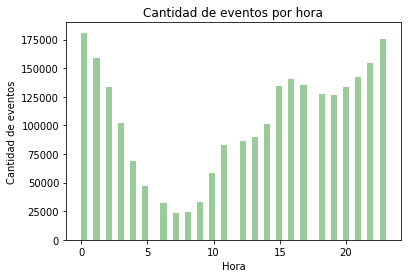

In [10]:
event_for_hour = events.loc[:, ['hour', 'event_id']]
event_for_hour = event_for_hour.dropna()
graph = sns.distplot (event_for_hour['hour'], kde=False, rug=False, label ="Cantidad de eventos por hora",\
                      hist_kws={"color":"g"})

graph.set_title("Cantidad de eventos por hora")
graph.set_ylabel("Cantidad de eventos")
graph.set_xlabel("Hora")



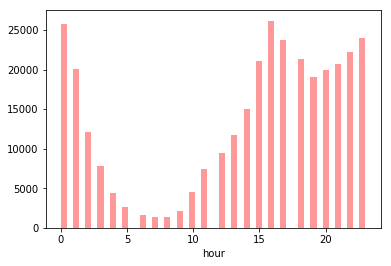

In [127]:
top_apps = [x for x in events['application_id'].value_counts().head(1).keys()]
events_app = events.loc[events['application_id'].isin(top_apps), ['hour', 'application_id']]
events_app.insert(loc = 2, column = 'cant', value=1)
#events_app.groupby(['application_id', 'hour']).agg('count').reset_index()
events_app
graph = sns.distplot (events_app['hour'], kde=False, rug=False, label ="Cantidad de eventos por hora por aplicación",\
                      hist_kws={"color":"r"})

#graph.set_title("Cantidad de eventos por hora por la aplicación mas ocurrente")
#graph.set_ylabel("Cantidad de eventos")
#graph.set_xlabel("Hora")

Text(0.5, 114.0, 'Dia')

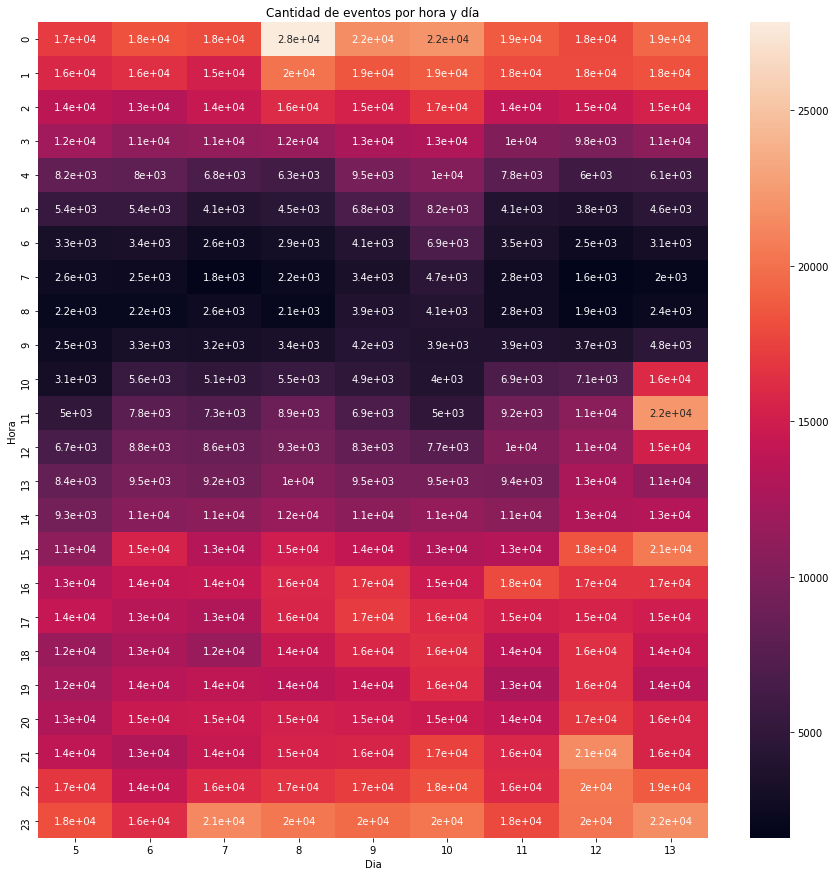

In [120]:
events_week_hour = events.loc[:,['hour', 'day']]
events_week_hour.insert(loc=2, column='cant_events', value=1)
events_week_hour = events_week_hour.pivot_table(index='hour', columns='day', values='cant_events', fill_value=0, aggfunc=np.sum)
plt.figure(figsize=(15,15))
graph = sns.heatmap(events_week_hour, annot=True)
graph.set_title("Cantidad de eventos por hora y día")
graph.set_ylabel("Hora")
graph.set_xlabel("Dia")

Text(0.5, 0, '')

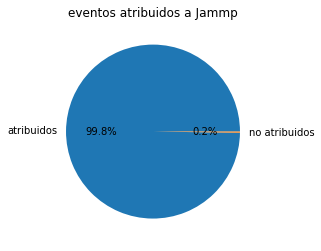

In [21]:
attributed_events = events.loc[: , ['event_id', 'attributed']]
attributed_events = attributed_events.groupby(['attributed']).agg('count').reset_index()

graph = attributed_events['event_id'].plot(kind='pie', autopct='%1.1f%%', labels=['no atribuidos', 'atribuidos'])

graph.set_title("eventos atribuidos a Jammp")
graph.set_ylabel("")
graph.set_xlabel("")

Text(0.5, 0, 'Hora')

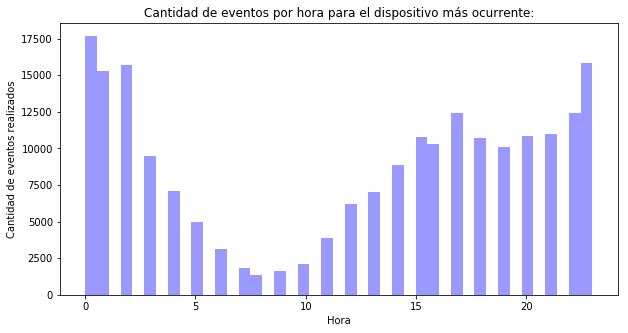

In [145]:
top_device_model = [x for x in events['device_model'].value_counts().head(1).keys()]

events_model = events.loc[events['device_model'].isin(top_device_model), ['hour']]
events_model.insert(loc=0, column='cant_events', value=1)

plt.figure(figsize=(10,5))
graph = sns.distplot (events_model['hour'], kde=False, rug=False, label = " histograma para dispositivo mas ocurrente",\
                      hist_kws={"color":"b"})
graph.set_title("Cantidad de eventos por hora para el dispositivo más ocurrente:")
graph.set_ylabel("Cantidad de eventos realizados")
graph.set_xlabel("Hora")

In [ ]:
events_device = events.loc[:, ['ref_hash', 'hour']]
events_device.insert(loc=2, column='cant_events', value=1)
events_device = events_device.groupby(['ref_hash', 'hour']).agg('sum')
#plt.figure(figsize=(25,15))
#graph = sns.barplot (x=events_device['hour'], y=events_device['cant_events'], data = events_device, hue = events_device['ref_hash'])
#graph = sns.violinplot ()
#graph.set_title("Cantidad de eventos por hora para el dispositivo más ocurrente:")
#graph.set_ylabel("Cantidad de eventos realizados")
#graph.set_xlabel("Hora")

Text(0.5, 0, 'Aplicaciones')

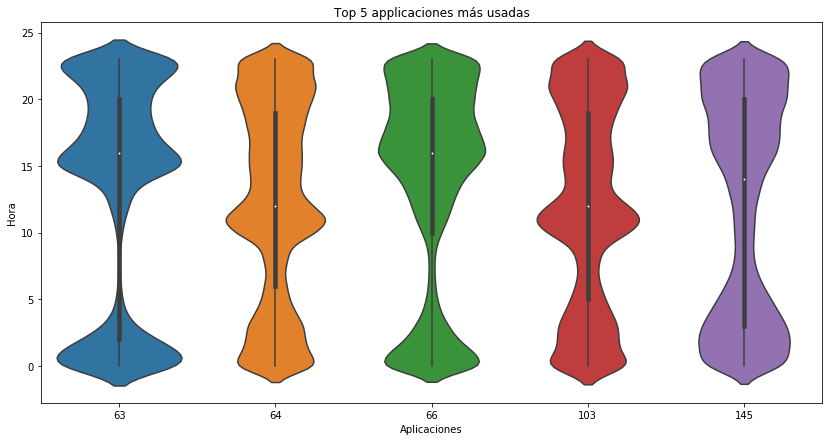

In [126]:
top_apps = [x for x in events['application_id'].value_counts().head(5).keys()]

events_apps = events.loc[events['application_id'].isin(top_apps), ['application_id', 'hour']]
events_apps.insert(loc = 1, column = 'cant', value = 1)

plt.figure(figsize=(14,7))
graph = sns.violinplot (y=events_apps['hour'], x=events_apps['application_id'], data=events_apps)
graph.set_title("Top 5 de applicaciones: Cantidad de eventos realizados por hora")
graph.set_ylabel("Hora")
graph.set_xlabel("Aplicaciones")

In [ ]:
top_devices = [x for x in events['ref_hash'].value_counts().head(10).keys()]

devices_events = 